<a href="https://colab.research.google.com/github/AnetaCzy/PUM_CzyzewskaDudziakHreczany/blob/main/preprocessing1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, poisson
import time
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [3]:
df = pd.read_csv("winequality_white.csv", sep = ";" , encoding= 'utf-8')

In [109]:
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.05,30,97.0,0.9951,3.26,0.44,10.1,6


In [4]:
df.shape
df.info()
df.head()
df.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   object 
 5   free sulfur dioxide   4898 non-null   object 
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   object 
 10  alcohol               4895 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(8), int64(1), object(3)
memory usage: 459.3+ KB


In [5]:
for column in df.columns:
  if df[column].dtype == 'object':
    df[column] = df[column].str.replace(' ', '')
    df[column] = df[column].str.rstrip('_')
    if df[column].str.replace('.', '').str.isnumeric().all():
            df[column] = df[column].astype(float)
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Index: 3963 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         3963 non-null   float64
 1   volatile acidity      3963 non-null   float64
 2   citric acid           3963 non-null   float64
 3   residual sugar        3963 non-null   float64
 4   chlorides             3963 non-null   float64
 5   free sulfur dioxide   3963 non-null   float64
 6   total sulfur dioxide  3963 non-null   float64
 7   density               3963 non-null   float64
 8   pH                    3963 non-null   float64
 9   sulphates             3963 non-null   float64
 10  alcohol               3960 non-null   float64
 11  quality               3963 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 402.5 KB
None
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36 

In [6]:
print(df['alcohol'].unique())

[   8.8           9.5          10.1           9.9           9.6
   11.           12.            9.7          10.8          12.4
   11.4          -9.6          12.8          11.3          10.5
    9.3          10.           10.4          11.6          12.3
   10.2           9.           11.2           8.6           9.4
    9.8          11.7          10.9           9.1           8.9
   10.3          12.6          10.7          12.7          10.6
    9.2           8.7          11.5                  nan   11.8
   12.1          11.1           8.5          12.5          11.9
   12.2         -10.           12.9        1000.           13.9
   14.           13.5          13.3          13.2          13.7
   13.4          13.            8.           13.1          13.6
    8.4          14.2          11.94         12.89333333   11.46666667
   10.98         10.03333333   11.43333333   10.53333333    9.53333333
   10.93333333   11.36666667   11.33333333   11.06666667    9.73333333
   11.05          9

In [7]:
df = df[df['alcohol'] >= 0]
max_alcohol = 100
df = df[df['alcohol'] <= max_alcohol]
df['alcohol'] = df['alcohol'].astype(float)
print(df['alcohol'].unique())

[ 8.8         9.5        10.1         9.9         9.6        11.
 12.          9.7        10.8        12.4        11.4        12.8
 11.3        10.5         9.3        10.         10.4        11.6
 12.3        10.2         9.         11.2         8.6         9.4
  9.8        11.7        10.9         9.1         8.9        10.3
 12.6        10.7        12.7        10.6         9.2         8.7
 11.5        11.8        12.1        11.1         8.5        12.5
 11.9        12.2        12.9        13.9        14.         13.5
 13.3        13.2        13.7        13.4        13.          8.
 13.1        13.6         8.4        14.2        11.94       12.89333333
 11.46666667 10.98       10.03333333 11.43333333 10.53333333  9.53333333
 10.93333333 11.36666667 11.33333333 11.06666667  9.73333333 11.05
  9.75       11.35        9.55       10.55       11.45       14.05
 12.33333333 12.75       13.8        12.15       13.05       11.26666667
 10.56666667 11.73333333 11.75       10.65       10.966

In [8]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df)

In [121]:
print(df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [9]:
X_train = df.dropna().drop('alcohol', axis=1)
y_train = df.dropna()['alcohol']
X_test = df[df['alcohol'].isnull()].drop('alcohol', axis=1)
if not X_test.empty:
    rf = RandomForestRegressor()
    rf.fit(X_train, y_train)
    predicted_alcohol = rf.predict(X_test)
    df.loc[df['alcohol'].isnull(), 'alcohol'] = predicted_alcohol
else:
    print("Brak próbek z brakującymi wartościami w kolumnie 'alcohol' dla danych testowych.")

Brak próbek z brakującymi wartościami w kolumnie 'alcohol' dla danych testowych.


In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap korelacji")
plt.show()

In [21]:
df['quality_class'] = pd.cut(df['quality'], bins=[0, 4, 7, 10], labels=['Low', 'Medium', 'High'])

X = df.drop(['quality', 'quality_class'], axis=1)
y = df['quality_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Naiwny klasyfikatotr Bayesa - bez hiperparametryzacji

In [22]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [23]:
# Przewidywanie klas dla danych testowych
y_pred_nb = nb_model.predict(X_test)

# Ocena modelu
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of the Naive Bayes classifier model:", accuracy_nb)

# Generowanie raportu klasyfikacji
print("Classification report for Naive Bayes classifier:")
print(classification_report(y_test, y_pred_nb))

Dokładność modelu naiwnego klasyfikatora Bayesa: 0.8320707070707071
Raport klasyfikacji dla naiwnego klasyfikatora Bayesa:
              precision    recall  f1-score   support

        High       0.07      0.29      0.11        17
         Low       0.18      0.26      0.21        27
      Medium       0.95      0.86      0.91       748

    accuracy                           0.83       792
   macro avg       0.40      0.47      0.41       792
weighted avg       0.91      0.83      0.87       792



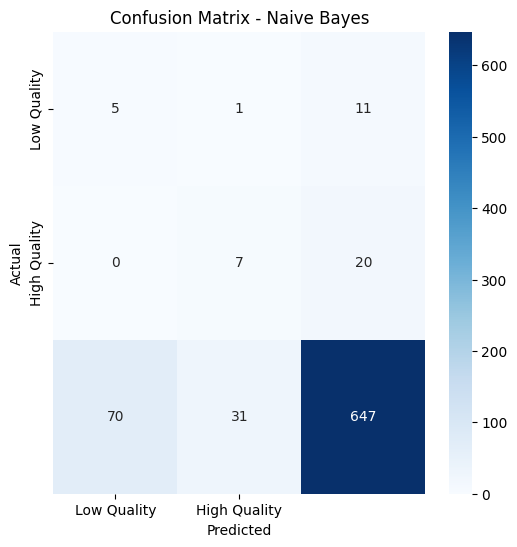

In [24]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

## Maszyna wektorów nośnych

### Maszyna wektorów nośnych z hiperparametryzacją
ZAJMUJE ONA DUŻO CZASU

In [10]:
# 35 minut przetwarzania!!!!

param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear', 'sigmoid']}

svm_model = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
svm_model.fit(X_train, y_train)
print("Best params:", svm_model.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.916 total time=   0.9s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.916 total time=   1.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.916 total time=   1.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.916 total time=   0.9s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.916 total time=   0.9s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.916 total time=   4.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.916 total time=   6.1s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.916 total time=   4.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.916 total time=   4.8s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.916 total time=   4.3s
[CV 1/5] END ....C=0.1, gamma=1, kernel=sigmoid;, score=0.916 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=1, kernel=sigmoid

![Udana Hiperparametryzacja SVM.PNG](<attachment:Udana Hiperparametryzacja SVM.PNG>)
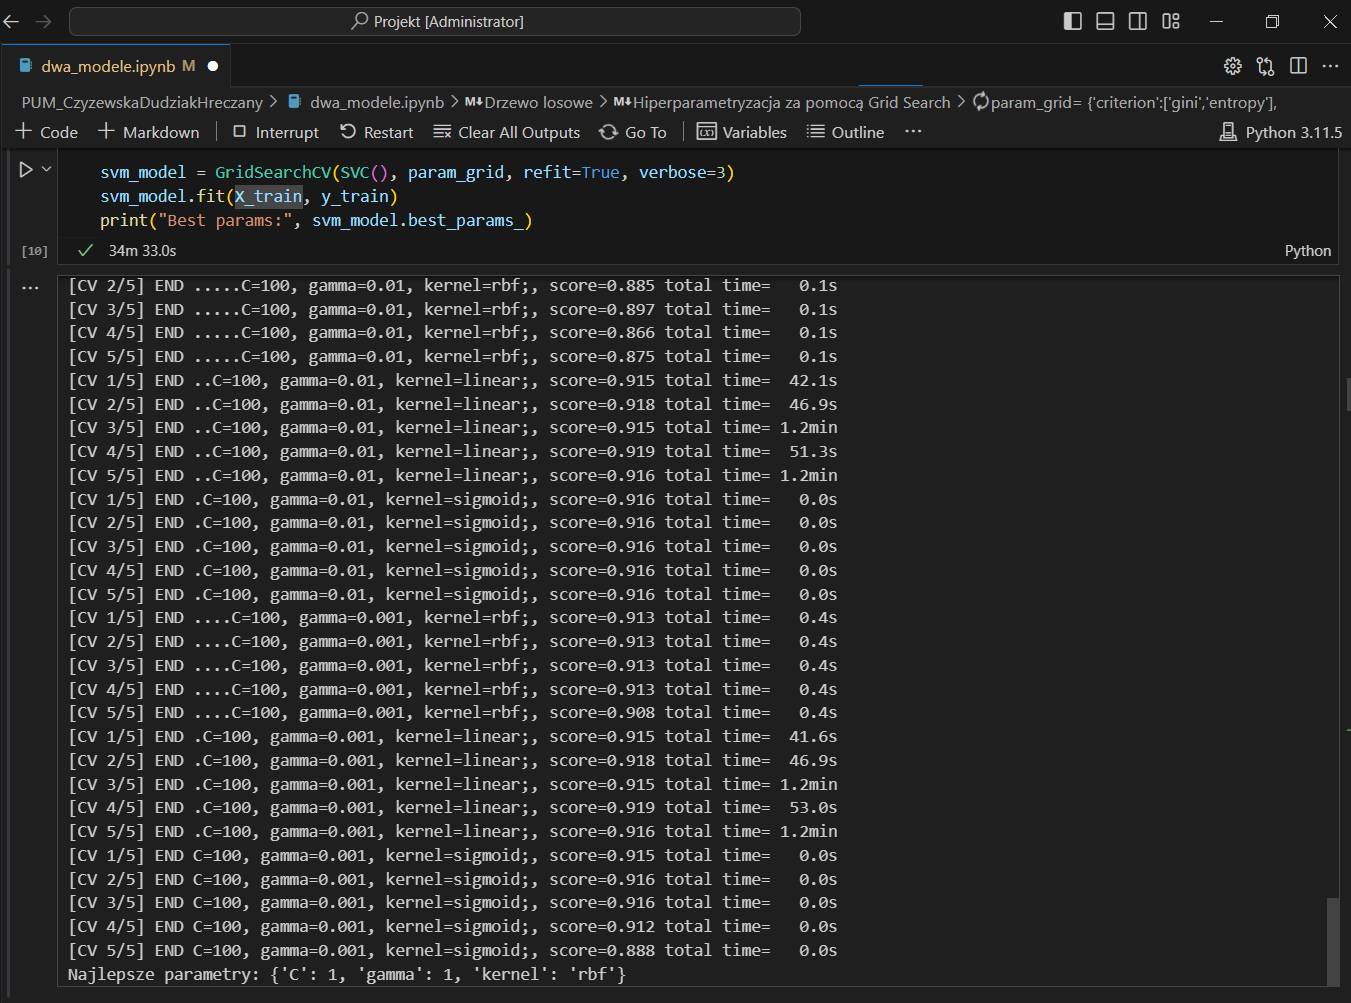

In [11]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model accuracy:", accuracy)

("Classification Report:")
print(classification_report(y_test, y_pred))

Dokładność modelu: 0.9444444444444444
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        17
         Low       0.00      0.00      0.00        27
      Medium       0.94      1.00      0.97       748

    accuracy                           0.94       792
   macro avg       0.31      0.33      0.32       792
weighted avg       0.89      0.94      0.92       792



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


![Raport klasyfikacji.PNG](<attachment:Raport klasyfikacji.PNG>)
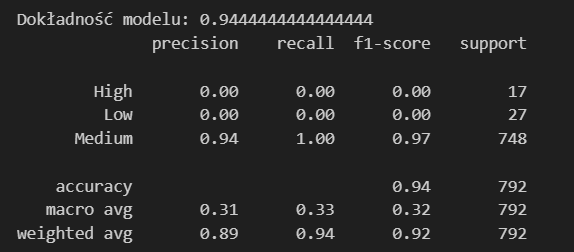

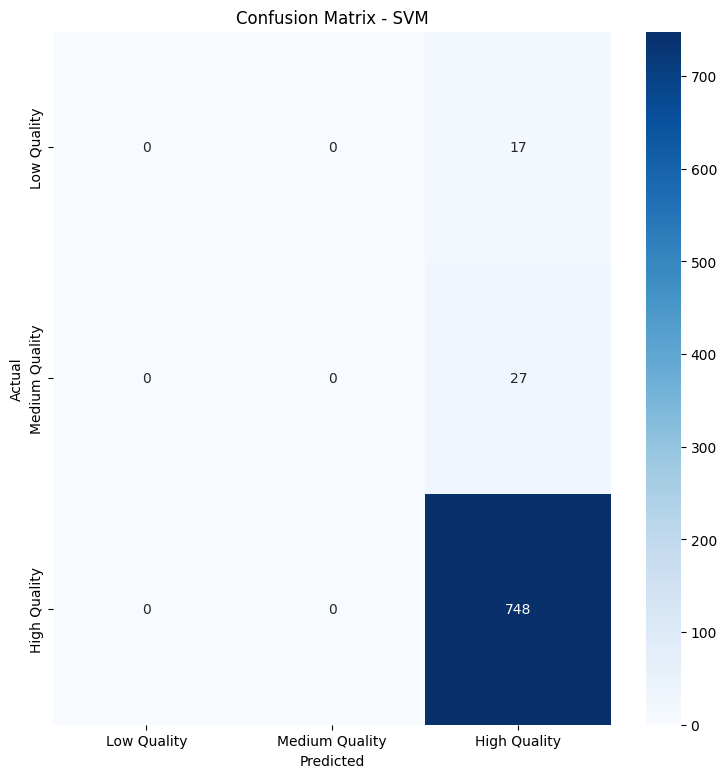

In [13]:
cm_svm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9, 9))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Quality', 'Medium Quality', 'High Quality'],
            yticklabels=['Low Quality', 'Medium Quality', 'High Quality'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

![macierz pomyłek dla svm.png](<attachment:macierz pomyłek dla svm.png>)
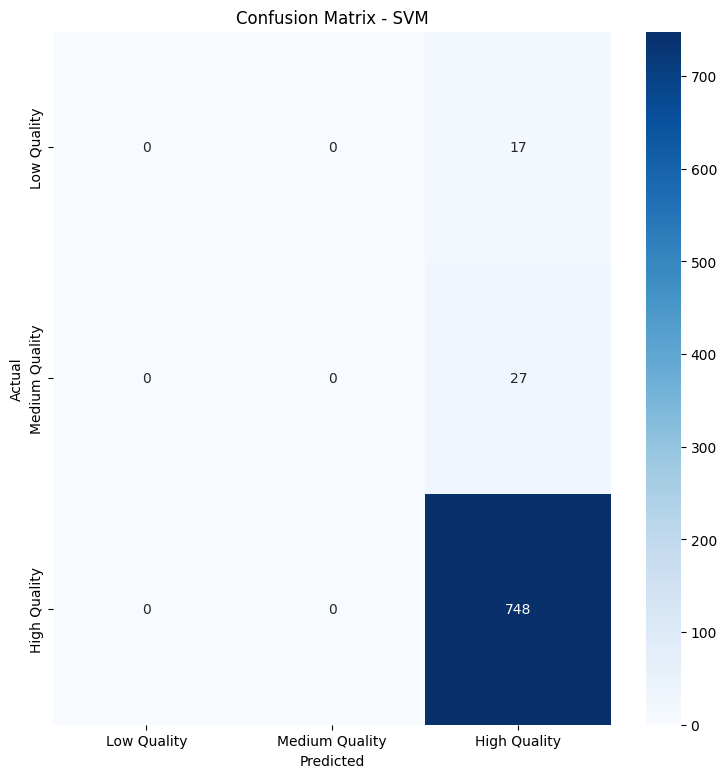

### Maszyna wektorów nośnych bez hiperparametryzacji

In [11]:
# Przetwarzanie i podział danych
df['quality_class'] = pd.cut(df['quality'], bins=[0, 4, 7, 10], labels=['Low', 'Medium', 'High'])

X = df.drop(['quality', 'quality_class'], axis=1)
y = df['quality_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

In [14]:
svm_model = SVC(random_state=34)
svm_model.fit(X_train, y_train)

SVC(random_state=34)

In [15]:
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Dokładność modelu SVM:", accuracy)

print("Raport klasyfikacji dla SVM:")
print(classification_report(y_test, y_pred))

Dokładność modelu SVM: 0.9175084175084175
Raport klasyfikacji dla SVM:
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        47
         Low       0.00      0.00      0.00        51
      Medium       0.92      1.00      0.96      1090

    accuracy                           0.92      1188
   macro avg       0.31      0.33      0.32      1188
weighted avg       0.84      0.92      0.88      1188



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Obliczenie macierzy pomyłek
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9, 9))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

## Drzewo losowe

In [25]:
# Budowa modelu i hiperparametryzacja
decision_tree  = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

### Hiperparametryzacja za pomocą Grid Search

In [26]:
param_grid= {'criterion':['gini','entropy'],
              'max_depth':np.arange(1,21).tolist(),
              'min_samples_split':np.arange(2,11).tolist(),
              'max_leaf_nodes':np.arange(3,26).tolist()}

grid_search = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)

best_params_gs = grid_search.best_params_
print(f'Best params: {best_params_gs}')

Fitting 10 folds for each of 8280 candidates, totalling 82800 fits


Best params: {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_split': 2}


In [33]:
# Najlepszy model z Grid Search
best_model_gs = grid_search.best_estimator_

best_model_gs.fit(X_train, y_train)

y_pred_gs = best_model_gs.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_gs)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred_gs))


Accuracy: 0.94
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        17
         Low       0.00      0.00      0.00        27
      Medium       0.94      1.00      0.97       748

    accuracy                           0.94       792
   macro avg       0.31      0.33      0.32       792
weighted avg       0.89      0.94      0.92       792



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###  Hiperparametryzacja za pomocą Randomised Search

In [29]:
param_rand = {'criterion':['gini','entropy'],
              'max_depth':poisson(mu=2,loc=2),
              'min_samples_split':uniform(),
              'max_leaf_nodes':poisson(mu=4,loc=3)}

rand_search = RandomizedSearchCV(DecisionTreeClassifier(), param_rand, cv=10, n_iter=100, random_state=42, n_jobs=-1)

start_time = time.time()
rand_search.fit(X_train,y_train)
duration = time.time() - start_time

best_params_rs = rand_search.best_params_
print(f'Best params: {best_params_rs}')

Best params: {'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 7, 'min_samples_split': 0.033050732900548385}


In [30]:
best_model = rand_search.best_estimator_

best_model.fit(X_train, y_train)

y_pred_rs = best_model.predict(X_test)

accuracy_rs = accuracy_score(y_test, y_pred_rs)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred_rs))

Accuracy: 0.92
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        17
         Low       0.00      0.00      0.00        27
      Medium       0.94      1.00      0.97       748

    accuracy                           0.94       792
   macro avg       0.31      0.33      0.32       792
weighted avg       0.89      0.94      0.92       792



c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


alcohol: 0.3704
free sulfur dioxide: 0.3630
volatile acidity: 0.1696
fixed acidity: 0.0970
sulphates: 0.0000
pH: 0.0000
density: 0.0000
total sulfur dioxide: 0.0000
chlorides: 0.0000
residual sugar: 0.0000
citric acid: 0.0000


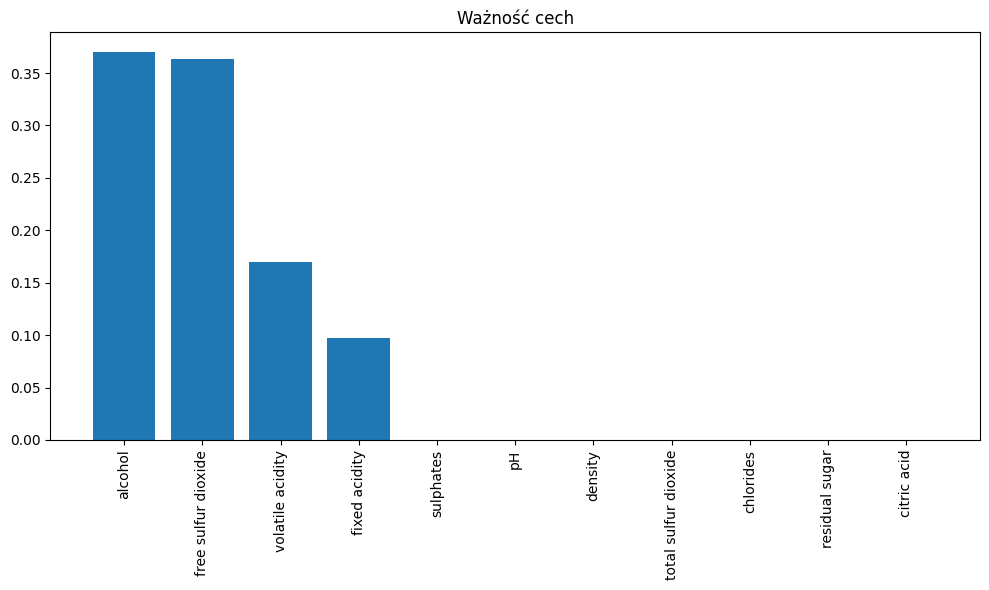

In [31]:
# Ważność cech
feature_importances = best_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

for i in range(X.shape[1]):
    print(f'{X.columns[indices[i]]}: {feature_importances[indices[i]]:.4f}')

plt.figure(figsize=(10,6))
plt.title("Ważność cech")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


### Macierze pomyłek dla obu sposobów hiperparametryzacji

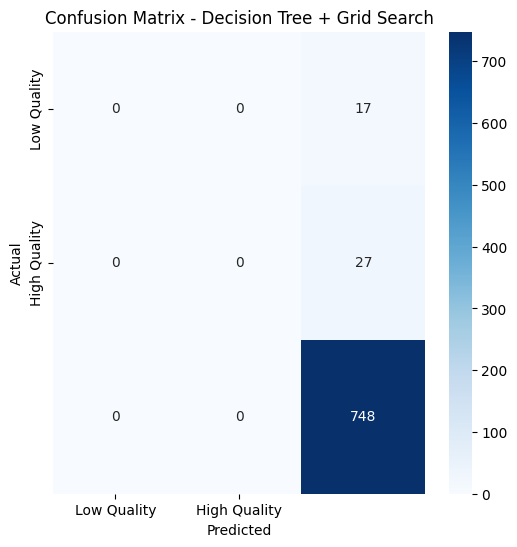

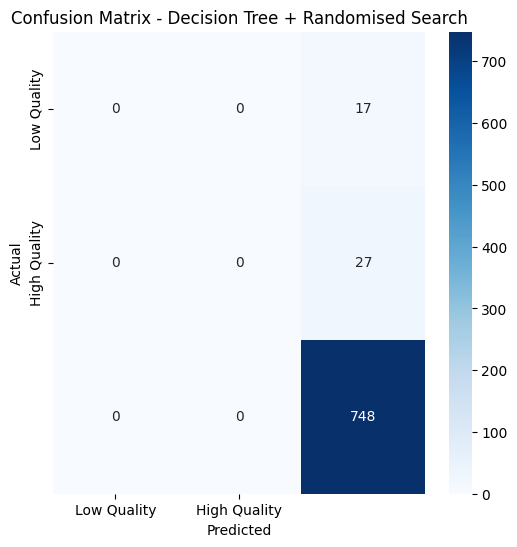

In [32]:
cm_dt = confusion_matrix(y_test, y_pred_gs)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree + Grid Search")
plt.show()

cm_dt = confusion_matrix(y_test, y_pred_rs)

plt.figure(figsize=(6, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Quality', 'High Quality'],
            yticklabels=['Low Quality', 'High Quality'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree + Randomised Search")
plt.show()